<i> Copyright &copy; 2025 Johns Hopkins University.  Not for distribution online or by any other means.</i>

Evan Edelstein, Programming Assignment 3, Algorithms 605.621  **PUT YOUR NAME ON THE ASSIGNMENT**

***Statement of Academic Integrity:*** The work in this exercise is mine alone without un-cited help. No AI was used to answer these questions. 

# Overview

In this assignment, we will continue to explore the Maryland Lighthouse Challenge problem.  In PA 2, you implemented a brute-force solution to the problem.  This is guaranteed to get the optimal solution, but it was extremely slow to run-- this is a very large issue for any "real world" implementation, as the data sets for actual problems may well run to millions or even billions of data points.  So, we are going to explore some techniques that can possibly make these more tractable.

In this assignment, we will explore how we can trade memory space for processing time, using a technique called *memoization*.  ("Memo", as in, making a memorandum of something, rather than *memo**R**ization*).  As you may have noticed in the last assignment, a lot of the calculations are repeated many times.  For example, if we have a set of five lighthouses (A, B, C, D, E), then the best path through the set (A, B, C) will be calculated at least twice, as part of the larger possible paths D-> E->(A, B, C) and E-> D-> (A, B, C); and both times, the brute force algorithm will compute all 6 possible pathways through (A, B, C).  If we stored the partial results for (A, B, C) in memory, it would be possible to skip some of this computation.  So, in this assignment, your algorithm should save a copy of each calculation it makes, and then save that in memory; if the same calculation returns again, it should use the stored result rather than re-calculating it.  In other words, your program should recognize when L_minus = [A, B, C] has been calculated before, and fetch the optimum path (say, C-> A-> B) and optimum time (say, 5.78) from memory, rather than recursing again.

For this problem, you should use the following assumptions:
1. The contest requires a visit of all lighthouses; the winner is the first team to visit all lights (the contestants do not need to return to the start point).
1. Teams may start at any lighthouse, and finish at any other lighthouse. 
1. Travel time from A to B is the same as the time from B to A. (Equivalently, the paths A->B->C and C->B->A are equal, and your algorithm is correct if it provides either one.  You do not need to provide both.)
1. Several utility functions are provided for your use-- you may modify these as you see fit, or write your own.  Your fastest_tour_bf() program from PA 2 will be a utility function for you to use in this assignment, to compare to the performance of your memoized program.
1. You may assume that, for step count purposes, a memory lookup is a single step.


# Restrictions

1. You should only use Python inbuilt data structures for this assignment (e.g. lists, dictionaries, tuples, etc.)  *Hint:* Pay close attention to the rules on whether a Python data type is *mutable* (changeable) or *immutable* (not)-- remember that only *immutable* data items (like tuples) should be used as keys to dictionaries.
1. You may not use Python libraries for combinatorics, sorting, permutations, combinations, or similar tools-- for example, you cannot use any function in Python's itertools library.  You need to build all logical structures that traverse the data set yourself, so that you can accurately measure the workload imposed by your algorithmic choices.
1. When in doubt, **ASK FIRST**
1. This is not a collaborative problem-- all the work in this notebook should be your individual effort
1. Don't change the signatures of the functions or the kickoff code, as this is used by the grader for automated correctness checking.  You will get points off if you modify the input and output blocks (noted with "DO NOT MODIFY THIS BLOCK") or if your code doesn't execute without modification.  
1. If you didn't get your code working correctly in PA 2, contact the instructor for assistance.


# PART 1:  IMPLEMENTATION

## 1a. Pseudocode (15 pts)

Starting with your fastest_tour_bf() code, modify the algorithm to maintain a data structure which contains the previously calculated path fragments and best times.  Then, the program should check whether the data needed is in the data structure, before recursing again.  If a new result must be calculated, the program should store the result in the data structure for future use.
	
<!--- This is a Markdown comment. -->
<!--- Separate the $...$ in many cases to get Latex to render properly.
      In output LaTeX, use incorrectly closed <span hidden> to pass in LaTeX options. -->

Function fastest_tour returns time, orderedList of lighthouses, number of 'steps' taken by code and assumes a global memo dictionary.

1. initialize global dict memo to empty dictionary 
1. initialize global int memo_hits and memo_misses, both set to 0 
1. $~~~~$
1. **function** fastest_tour_memo(start_light, L):<span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~$ best_tour $\gets$ [] *# hold best tour of lighthouses*<br>
1. $~~~~$ best_time $\gets$ INFINITY *# hold best tour time*<br>
1. $~~~~$ all_steps $\gets$ 0 *# hold totoal number of steps*<br>
1. $~~~~$ L $\gets$ **list_minus**(L, start_light) *#remove start_light from L*<br>
1. $~~~~$ 
1. $~~~~$ *# Create key for memo lookup*
1. $~~~~$ memo_lookup_key $\gets$ tuple(start_light, frozenset(L))
1. $~~~~$ 
1. $~~~~$ if memo_lookup_key in memo:
1. $~~~~~~~$ increment global memo hits counter
1. $~~~~~~~$ best_tour, best_time $\gets$ memo\[memo_lookup_key\]
1. $~~~~~~~$ **return** best_tour, best_time, 1 
1. $~~~~$ 
1. $~~~~$ increment global memo_misses
1. $~~~~$ 
1. $~~~~$ if L.length is 0: <span hidden>\setlength\itemsep{0.0em}</div>
1. $~~~~~~~$ best_tour.insert(start_light)
1. $~~~~~~~$ best_time $\gets$ 0.0
1. $~~~~~~~$ memo\[memo_lookup_key\] = \[best_tour\, best_time\]
1. $~~~~~~~$ **return** best_tour, best_time, 1 
1. $~~~~$ 
1. $~~~~$ for second_light in L:
1. $~~~~~~~$ curr_tour, curr_time, steps = **fastest_tour_memo**(second_light, L, memo)
1. $~~~~~~~$ increment all_steps by steps
1. $~~~~~~~$ curr_time $\gets$ curr_time + **get_travel_time**(start_light, second_light)
1. $~~~~~~~$ if curr_time < best_time:
1. $~~~~~~~~~~$ update best_time to curr_time and best_tour to curr_tour
1. $~~~~$ best_tour.insert_front(start_light)
1. $~~~~$ memo[memo_lookup_key] = \[best_tour, best_time\]
1. $~~~~$ **return** best_tour, best_time, all_steps 






<!-- 
def fastest_tour_memo(start_light: str, L: list[str]) -> tuple[list[str], float, int, dict]:
    def fastest_tour_memo_inner(start_light: str, L: list[str], memo: dict[tuple, tuple[list[str], float]]):
        best_tour = []  # used to store the running best overall tour that starts at start_light
        best_time = inf  # used to store the time for the best_tour sequence
        all_steps = 0
        L = list_minus(L, start_light)
        K = tuple([start_light] + L)
        m = memo.get(K)

        if len(L) == 1:
            second_light = L[0]
            best_tour = [start_light, second_light]
            best_time = get_travel_time(start_light, second_light)
            memo[K] = (best_tour, best_time)
            return best_tour, best_time, 1, memo
        
        if m is not None: # Memo Hit
            best_tour, best_time = m # best time already includes start light!!!
            all_steps += 1
        else: # RECURSIVE CASE
            for second_light in L:
                curr_tour, curr_time, steps, memo = fastest_tour_memo_inner(second_light, L, memo)
                all_steps += steps
                curr_time += get_travel_time(start_light, second_light)
                if curr_time < best_time:  # update best_tour and best_time with new candidate
                    best_tour = curr_tour
                    best_time = curr_time
            best_tour = [start_light] + best_tour
            memo[K] = (best_tour, best_time)
        return best_tour, best_time, all_steps, memo
    memo = {}
    return fastest_tour_memo_inner(start_light, L, memo) -->


## 1b. English-language explanation (15 pts)
The function *fastest_tour_memo(start_light, L)* defines an algorithm to find the fastest tour through an array of lighthouses L starting from a lighthouse *start_light* using memoization. An external function, *get_travel_time(x,y)* is used to lookup the travel time between two lighthouses. *fastest_tour_memo()* begins by initializing an array *best_tour* to hold the lighthouse tour order. A variable *best_time* is used to keep track of the total travel time between the lighthouses in the tour and is initialized to infinity. The variable *all_steps*, which is initialized to zero, counts the number of “computational steps” made by the program, as a way of estimating the Big-O runtime of the algorithm. Next the starting lighthouse is removed from L using an externally defined function *list_minus()*. We now enter the core of the algorithm, the base case, memo case and recursive case. We use the technique of memoization to optimize the search for fastest tour. Memoization is the use of an external data structure to store previously computed results to subproblems to avoid performing duplicate work. In *fastest_tour_memo ()* a global dictionary, *memo* is defined and reset by calling code. We define the *memo_lookup_key * to be a tuple with the starting lighthouse in the first position and a frozenset of the remaining lighthouses in the second position. As we will see later, we need to key by the starting lighthouse since the *best_tour* and *best_time* calculations take the starting light into account. The list of remaining lighthouses must be cast to a frozenset, since Python requires dictionary keys to be immutable to define a valid hash function. Frozensets also provide an advantage to tuples, as their equality test is order independent.

 We can now describe the three cases. The memo hit case occurs if the *memo_lookup_key* is present in *memo*. If so, we have a memo hit, which means the solution the best tour has already been computed. We can retrieve the *best_tour* and *best_time* from memo using the *memo_lookup_key*. We increment the global *memo_hit* counter and *all_steps* before returning *best_tour*, *best_time* and *all_steps*.

If *memo_lookup_key* is not present in *memo* and no remaining lighthouses remain, we have hit the base case. We precede by inserting the starting lighthouse into *best_tour*, setting *best_time* to zero and adding an array [*best_tour*, *best_time*] to *memo*, using the *memo_lookup_key* defined above. We also increment *all_steps* to denote the constant time worked done by the base case. We then return *best_tour*, *best_time* and *all_steps*. 

If there are one or more remaining lighthouses and the *memo_lookup_key* is not in *memo* we find the subproblem solution via recursion. We perform a for-loop over each remaining lighthouse to recursively calculate the best tour/time. For each *second_light* in the remaining lighthouses we recursively call *fastest_tour_memo()* with *second_light* and *L* as arguments. We then increment *all_steps* by the recursive steps, add the travel time between *start_light*  and *second_light* to the time returned by the recursive call, and update *best_tour* and *best_time* if this time is faster than *best_time*. After the for-loop we insert *start_light* at the front of *best_tour*. Now that we have computed the fastest tour from the starting lighthouse through *L*, we can store that result in *memo* using the *memo_lookup_key*. We than return *best_tour*, *best_time* and *all_steps*. 

In all three cases the function returns the best tour, fastest tour time and number of steps taken by the program. We rely on the recursive and base case to solve the subproblems with varying starting lighthouses and *L*'s and use the memo hit case to avoid performing redundant work. 


## 1c. Code implementation (25 pts)

Implement your pseudocode from above, using the following signature and code snippets.  Your code must have a reasonable, consistent, style and documentation. It must have appropriate data structures, modularity, and error checking.  Be sure to preserve the instructor input block, and do not change names of any of the variables - they will be inputted fresh by the instructor when testing your code.  Print the best tour and time, using the TRAVEL_TIME and L provided in the instructor input block, so that the correctness of your implementation can be validated.

In [1]:
####################################################
# INSTRUCTOR INPUT BLOCK
# THIS BLOCK WILL BE REPLACED BY INSTRUCTOR INPUTS
# DO NOT CHANGE THE NAMES OF THESE VARIABLES/METHODS
####################################################

TRAVEL_TIME = {
    ('B', 'A'): 8.043412251828856,
    ('B', 'C'): 6.961562065036552,
    ('B', 'E'): 11.182761725279896,
    ('B', 'D'): 4.829491781522557,
    ('A', 'C'): 11.933637650024707,
    ('A', 'E'): 17.726993564286605,
    ('A', 'D'): 9.160385528861413,
    ('C', 'E'): 13.366783356602122,
    ('C', 'D'): 5.995980076893033,
    ('E', 'D'): 10.864682204416317,
}
# Additional test data is given at the bottom of the notebook.  You should also create your own test data as needed

# This function will populate a list L containing the names of the lighthouses
L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

In [2]:
# Utility functions that you can use if you wish

def list_minus(L, x):
    # Returns a list of L that does not have x in it
    return list(set(L)-set([x,]))

# def travel_time(x, y):
#     # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
#     global TRAVEL_TIME
#     try:
#         tm = TRAVEL_TIME[(x,y)]
#     except:
#         tm = TRAVEL_TIME[(y,x)]
#     return tm


def random_lighthouses(n):
    # Generates a random list of n lighthouses
    # returns a dictionary in the same format as TRAVEL_TIME and a list of lighthouses (new_L)

    from string import ascii_uppercase
    from random import uniform
    # students aren't allowed to use itertools for this assignment
    from itertools import combinations as illegal_for_students
    from math import sqrt
    
    new_TRAVEL_TIME = {}
    new_L = []
    pts = {}
    letters = list(ascii_uppercase)

    for i in range(1, n+1):
        x = uniform(1, 10)
        y = uniform(1, 10)
        pt_name = letters[i - 1]
        pts[pt_name] = (x, y)
        new_L.append(pt_name)

    pairs = list(illegal_for_students(new_L, 2))
    for i in pairs:
        pt1 = pts[i[0]]
        pt2 = pts[i[1]]
        dist = sqrt((pt1[0] + pt2[0] ** 2 + (pt1[1] + pt2[1]) ** 2))
        name = (i)
        new_TRAVEL_TIME[name] = dist
    return new_TRAVEL_TIME, new_L


def lighthouse_names(L):
    # Gets a list of the names of the lighthouses in dictionary L
    return list(set([item for k in TRAVEL_TIME.keys() for item in k]))

In [3]:
####################################################
# MY BRUTE FORCE FUNCTION
####################################################
from math import inf


def get_travel_time(x: str, y: str) -> float:
    # Looks up x and y in TRAVEL_TIME in a way that order does not matter, returns a time
    global TRAVEL_TIME
    tm = TRAVEL_TIME.get((x, y), TRAVEL_TIME.get((y, x)))
    if tm is None:
        raise KeyError(f"{x=} and {y=} not in TRAVEL_TIME.")
    return tm

# Put your code for fastests_tour_bf() from PA 2 here to use as a utility function
# If you didn't get your code working correctly, contact the instructor for assistance

def fastest_tour_bf(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    # used to store the running best overall tour that starts at start_light
    best_tour, best_time, steps,  = [], inf, 0
    L = list_minus(L, start_light)  # remove start_light from list

    if len(L) == 0:
        return [start_light], 0, 1

    for second_light in L:
        # recurse to find shortest subpath of L starting from second_light
        sub_tour, sub_time, sub_steps = fastest_tour_bf(second_light, L)
        steps += sub_steps
        # calc time between start_light and second_light
        sub_time += get_travel_time(start_light, second_light)
        if sub_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = sub_tour
            best_time = sub_time

    # insert start_light at the front of best tour
    best_tour.insert(0, start_light)
    return best_tour, best_time, steps

In [4]:
####################################################
# MY MEMOIZED FUNCTION
####################################################
from math import inf

global memo_hits
memo_hits = 0
global memo_miss
memo_miss= 0
global memo
memo = {}

def reset_memo():
    global memo_hits
    memo_hits = 0
    global memo_miss
    memo_miss= 0
    global memo
    memo = {}


def fastest_tour_memo(start_light: str, L: list[str]) -> tuple[list[str], float, int]:
    """ 
    Find the fastest tour through L starting at start_light using memoization to store already computed tours.
    Assumes a global dictionary memo is available and keyed on a tuple (lighthouse, frozenset(lighthouses)). The memo values should be of the form (best_tour, best_time). 
    The number of "computational steps" taken by the function is stored in all_steps and the number of times the best_tour/time is retrieved from the memo is stored in a global counter memo_hits. 
        
    Args:
        start_light (str): starting lighthouse
        L (list[str]): list of lighthouses of tour

    Returns:
        best_tour (list[str]): best tour of lighthouses
        best_time (float): time to traverse lighthouse tour
        all_steps (int): number of computational steps executed by the algorithm
    """    
    best_tour = []  # used to store the running best overall tour that starts at start_light
    best_time = inf  # used to store the time for the best_tour sequence
    all_steps = 0 # count all O(1) work here
    L = list_minus(L, start_light)  # O(1)
    memo_lookup_key = (start_light, frozenset(L)) # O(1)?
    
    # MEMO HIT: return best_tour and best_time from memo - O(1)
    if memo_lookup_key in memo: 
        best_tour, best_time = memo[memo_lookup_key] # get best tour and time from memo
        global memo_hits 
        memo_hits+=1 # record memo hit
        return best_tour, best_time, 1

    global memo_miss
    memo_miss +=1 # record memo miss

    # BASE CASE: return start_light, tour time of zero, and single step
    # if len(L) == 0:  # O(1)
    #     memo[memo_lookup_key] = ([start_light], 0.0)
    #     return [start_light], 0.0, 1
    
    # BASE CASE: return start_light, tour time of zero, and single step
    if len(L) == 1: 
        best_tour = [start_light, L[0]]
        best_time = get_travel_time(start_light, L[0])
        memo[memo_lookup_key] = (best_tour, best_time)
        return best_tour, best_time, 1
    
    # RECURSIVE CASE: recurse to find shortest subpath of L starting from second_light
    for second_light in L: # O(n-1)
        curr_tour, curr_time, steps = fastest_tour_memo(second_light, L)
        all_steps += steps
        curr_time += get_travel_time(start_light, second_light)
        if curr_time < best_time:  # update best_tour and best_time with new candidate
            best_tour = curr_tour
            best_time = curr_time
    
    best_tour = [start_light] + best_tour # insert start_light at the front of best tour
    memo[memo_lookup_key] = (best_tour, best_time) # add best tour to memo
    return best_tour, best_time, all_steps

In [5]:
####################################################
# KICKOFF CODE
# This will run an outer loop to try all possible starting lights
# You will need to adjust this code to match your implementation
####################################################


def fastest_tour_wrapper_memo(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_memo to find shortest path amongst all starting possible lighthouses
        
    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of computational steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
        memo_size (int): size of memo dict 
    """
    # print(f"MEMO: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    tours = {}
    best_tour = []
    best_time = inf
    outer_steps = 0
    reset_memo() # reset memo dict and memo hits counter
    for start_light in L:
        L_minus = list_minus(L, start_light)
        sub_tour, sub_time, steps = fastest_tour_memo(start_light, L_minus)
        outer_steps += steps
        tours[start_light] = (sub_tour, sub_time)
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("MEMO - The best tour is: ", ', '.join(best_tour))
    # print("MEMO - The best time is: ", best_time)
    # print("MEMO - # of steps: ", outer_steps)
    # print("MEMO - Memo Size: ", len(memo))
    return best_tour, best_time, outer_steps, tours, len(memo)


def fastest_tour_wrapper_bf(L: list[str], travel_time_dict: dict[tuple[str, str], float]):
    """ Wrapper to fastest_tour_bf to find shortest path amongst all starting possible lighthouses

    Args:
        L (list[str]): light of lighthouses to visit
        travel_time_dict (dict[tuple[str], float]): _description_

    Returns:
        best_tour (list[str]): list of lighthouses to tour with fastest time
        best_time (float): time to traverse lighthouse tour
        steps (int): number of recursive steps executed by the algorithm
        tours (dict[(list[str], float)]): a mapping of each starting light to the best tour and time
    """
    # print(f"BF: Working on {L=}")
    # update global dict TRAVEL_TIME
    global TRAVEL_TIME
    TRAVEL_TIME = travel_time_dict
    tours = {}
    best_tour = []
    best_time = inf
    all_steps = 0
    for start_light in L:
        sub_tour, sub_time, steps = fastest_tour_bf(start_light, L)
        tours[start_light] = (sub_tour, sub_time)
        all_steps += steps
        if sub_time < best_time:
            best_tour = sub_tour
            best_time = sub_time
    # print("BF - The best tour is: ", ', '.join(best_tour))
    # print("BF - The best time is: ", best_time)
    # print("BF - # of steps: ", all_steps)
    return best_tour, best_time, all_steps, tours


best_tour, best_time, all_steps, tours, memo_size = fastest_tour_wrapper_memo(L, TRAVEL_TIME)
print("The best tour is: ", ', '.join(best_tour))
print("The best time is: ", best_time)
print("# of steps: ", all_steps)

# best_tour, best_time, best_steps, tours = fastest_tour_wrapper_bf(L, TRAVEL_TIME)

# Uncomment one of these implementations
# If using a recursive step count:
# best_tour = []
# best_time = inf
# steps = 0
# for start_light in L:
#     L_minus = list_minus(L, start_light)
#     curr_tour, curr_time, curr_steps , _ = fastest_tour_memo(start_light, L_minus)
#     if curr_time < best_time:
#         best_tour = curr_tour
#         best_time = curr_time
#         steps = curr_steps

# If using a global variable for step count:
# best_tour = []
# best_time = inf
# steps = 0
# for start_light in L:
#    L_minus = list_minus(L, start_light)
#    curr_tour, curr_time = fastest_tour_bf(start_light, L_minus)
#    if curr_time < best_time:
#        best_tour = curr_tour
#        best_time = curr_time

The best tour is:  A, B, C, D, E
The best time is:  31.86563659817476
# of steps:  90


In [6]:
####################################################
# CORRECTNESS CHECK
# Do not modify this block
# Grader data will be placed here and must run without errors
####################################################

TRAVEL_TIME = {
    ('B', 'A'): 8.043412251828856,
    ('B', 'C'): 6.961562065036552,
    ('B', 'E'): 11.182761725279896,
    ('B', 'D'): 4.829491781522557,
    ('A', 'C'): 11.933637650024707,
    ('A', 'E'): 17.726993564286605,
    ('A', 'D'): 9.160385528861413,
    ('C', 'E'): 13.366783356602122,
    ('C', 'D'): 5.995980076893033,
    ('E', 'D'): 10.864682204416317,
}

L = list(set([item for k in TRAVEL_TIME.keys() for item in k]))

# Uncomment one of these implementations
# If using a recursive step count:
best_tour = []
best_time = inf
steps = 0
reset_memo()
for start_light in L:
    L_minus = list_minus(L, start_light)
    curr_tour, curr_time, curr_steps = fastest_tour_memo(start_light, L_minus)
    steps += curr_steps # count the above function call
    if curr_time < best_time:
        best_tour = curr_tour
        best_time = curr_time

# If using a global variable for step count:
# best_tour = []
# best_time = inf
# steps = 0
# for start_light in L:
#    L_minus = list_minus(L, start_light)
#    curr_tour, curr_time = fastest_tour_bf(start_light, L_minus)
#    if curr_time < best_time:
#        best_tour = curr_tour
#        best_time = curr_time

print("The best tour is: ", ', '.join(best_tour))
print("The best time is: ", best_time)
print("Steps: ", steps)
print("Memo hits: ", memo_hits)

The best tour is:  A, B, C, D, E
The best time is:  31.86563659817476
Steps:  90
Memo hits:  70


# PART 2: ANALYSIS

## 2a. Asymptotic bounds (10 pts)

Using the techniques that you learned in Modules 1 and 2, provide an analytic estimate of the asymptotic bounds (Big-O, Big-Theta, etc.) for your algorithm. 

*Hint:  The memoization technique's improvement comes because the recursion tree is "pruned" at higher and higher levels, as longer and longer path fragments are explored and then stored in memory.  It may be helpful to you to look at some smaller cases, where you can draw the recursion tree and watch this behavior happen.  You may find it instructive to consider how many times a particular "level" of the recursion tree will be executed in this algorithm, and draw conclusions about the total workload based on that.*


The runtime of the brute force approach without memoization is θ(n!) where n is the number of lighthouses in L. The runtime of the memoized version of *fastest_tour_memo()* can be investigating by tracking the number of subproblems encountered by the algorithm, as opposed to the brute force approach, and the complexity of each subproblem.  The outer loop performed by the wrapper code resets memo and then kick-offs *fastest_tour_memo()* for each lighthouse in *L* as the starting lighthouse. This results in a factor of θ(n) for each function call. Within *fastest_tour_memo()* several constant time operations are performed, such as initialization of *best_tour*, *best_time* and *all_steps* variables. Additionally, the constant time set operation *list_minus()* is called to remove *start_light* from *L*. We next construct the *memo_lookup_key* which involves creating a frozenset from *L*, which for the sake of analysis will assume is a constant time operation. A constant time dictionary lookup is performed to check if *memo_lookup_key*  is in *memo*. If it is more constant time operations, such as dictionary insertion and addition performed before the algorithm returns. These operations can be compress into constant time factor of O(1) toward the runtime. Similarly, in the base case constant time operations, such as dictionary insertion and addition are performed before returning. In the recursive case several more constant time comparisons, additions and dictionary insertion are performed, as well as n-1 recursive calls. This contributes an $O(n-1)$ factor towards the runtime. 

Each starting lighthouse has $(2^{n-1})$ unique subproblems to solve. This can be shown by viewing the problem in terms of how many unique combinations, of any size, of lighthouses can be made foreach set of lighthouses excluding the starting lighthouse. By equation C.4 in CLRS, the number of unique combinations of all sizes can be quantified as $(2^n)$. Since we have n starting lighthouses the total number of subproblems or sets of lighthouses searched with memoization is $n*2^{n-1}$, we subtract one from *n* since we have locked the starting lighthouse into place. For each of these subproblems we perform $(n-1)$  recursive calls in the for-loop. Thus, in total the runtime can be quantified as:

$O((n-1)*(n*2^{n-1}+O(1)))→$

$O(n*(n-1)*2^{n-1})→$

$O(n^2*2^n)$


## 2b. Code analysis (25 pts)

To estimate the computational complexity of your algorithm, you will need to run it against a number of different scenarios and capture a measure of the work done for each run.  Using the provided utility function, generate random sets of 3-10 lighthouses and then run your algorithm on them.  Gather the execution steps that your algorithm expends on them and then plot the results. Also collect the performance data on your original, brute force implementation (using the same set of lighthouses) and plot those. Finally, provide an analysis of your algorithm's running time and performance, in comparison to both your analytic result and the performance of the brute force algorithm.


In [12]:
# MY CODE BLOCK TO EXPERIMENT WITH 3-10 LIGHTHOUSES AND GATHER EXECUTION STEPS

START, STOP = 3, 11


def make_examples(start, stop):
    result_bf_steps = []
    result_memo_steps = []
    result_memo_sizes = []
    result_memo_hits = []
    result_memo_misses = []
    for i in range(start, stop):
        time_dict, L = random_lighthouses(i)
        best_tour, best_time, memo_steps, tours, memo_size = fastest_tour_wrapper_memo(L, time_dict)
        
        result_memo_sizes.append(memo_size)
        result_memo_steps.append(memo_steps)
        result_memo_hits.append(memo_hits)
        result_memo_misses.append(memo_miss)
        
        best_tour, best_time, bfsteps, tours = fastest_tour_wrapper_bf(L, time_dict)
        result_bf_steps.append(bfsteps)
    return result_bf_steps, result_memo_steps, result_memo_sizes, result_memo_hits, result_memo_misses


result_bf_steps, result_memo_steps, result_memo_sizes, result_memo_hits, result_memo_misses = make_examples(START, STOP)
print("Xvals=", list(range(START, STOP)))
print(f"{result_bf_steps=}")
print(f"{result_memo_steps=}")
print(f"{result_memo_sizes=}")
print(f"{result_memo_hits=}")
print(f"{result_memo_misses=}")

Xvals= [3, 4, 5, 6, 7, 8, 9, 10]
result_bf_steps=[6, 24, 120, 720, 5040, 40320, 362880, 3628800]
result_memo_steps=[6, 24, 90, 300, 910, 2576, 6930, 17940]
result_memo_sizes=[9, 28, 75, 186, 441, 1016, 2295, 5110]
result_memo_hits=[0, 12, 70, 270, 868, 2520, 6858, 17850]
result_memo_misses=[9, 28, 75, 186, 441, 1016, 2295, 5110]


### Plot
Plot the execution steps below.  You can use the plotting example from PA 1 as a guide here.

    X     | BF STEPS |MEMO STEPS|MEMO SIZE |MEMO_HITS |MEMO_MISSES|  BMARK   
----------------------------------------------------------------------------------------------------
   3.00   |   6.00   |   6.00   |   9.00   |   0.00   |   9.00   |   4.00   
   4.00   |  24.00   |  24.00   |  28.00   |  12.00   |  28.00   |  24.00   
   5.00   |  120.00  |  90.00   |  75.00   |  70.00   |  75.00   |  96.00   
   6.00   |  720.00  |  300.00  |  186.00  |  270.00  |  186.00  |  320.00  
   7.00   | 5040.00  |  910.00  |  441.00  |  868.00  |  441.00  |  960.00  
   8.00   | 40320.00 | 2576.00  | 1016.00  | 2520.00  | 1016.00  | 2688.00  
   9.00   |362880.00 | 6930.00  | 2295.00  | 6858.00  | 2295.00  | 7168.00  
  10.00   |3628800.00| 17940.00 | 5110.00  | 17850.00 | 5110.00  | 18432.00 


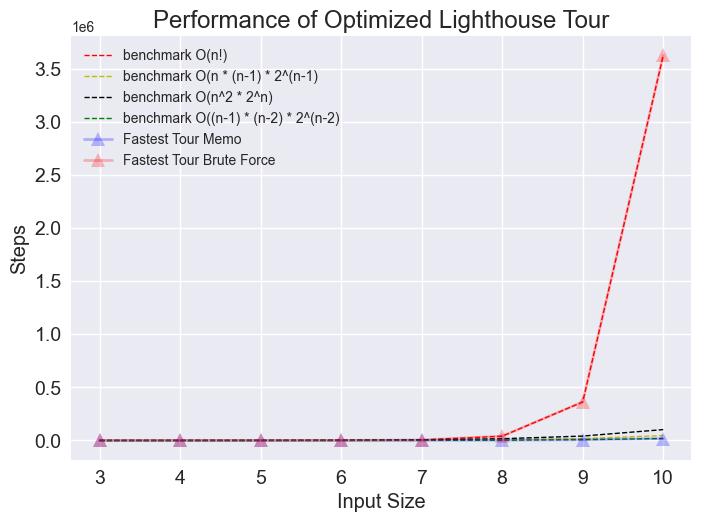

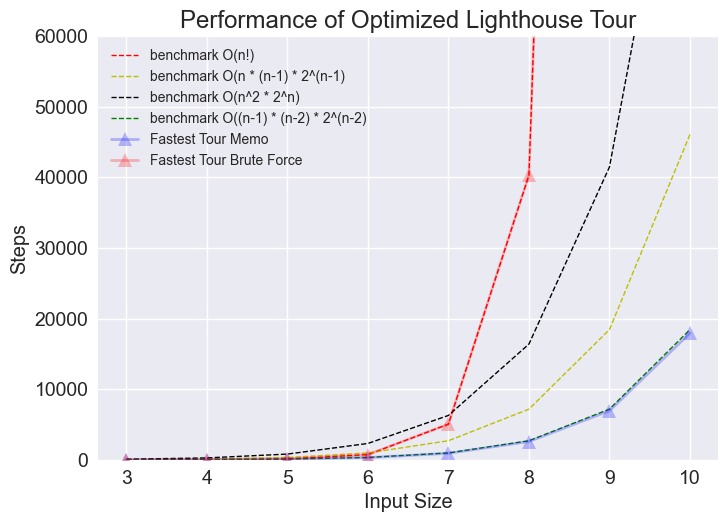

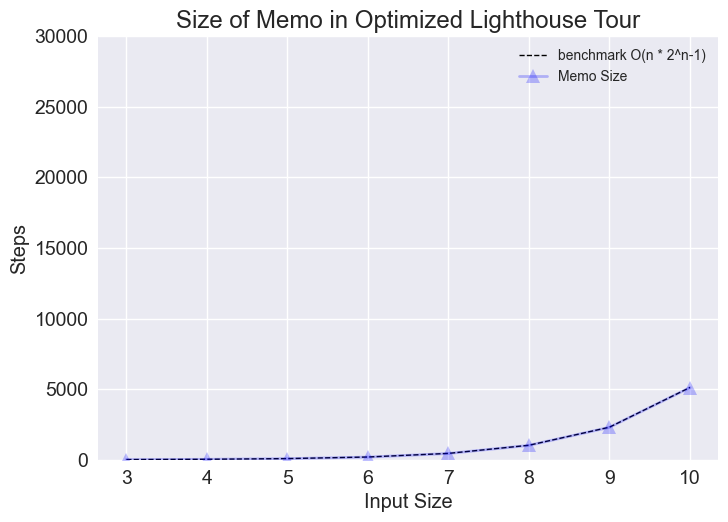

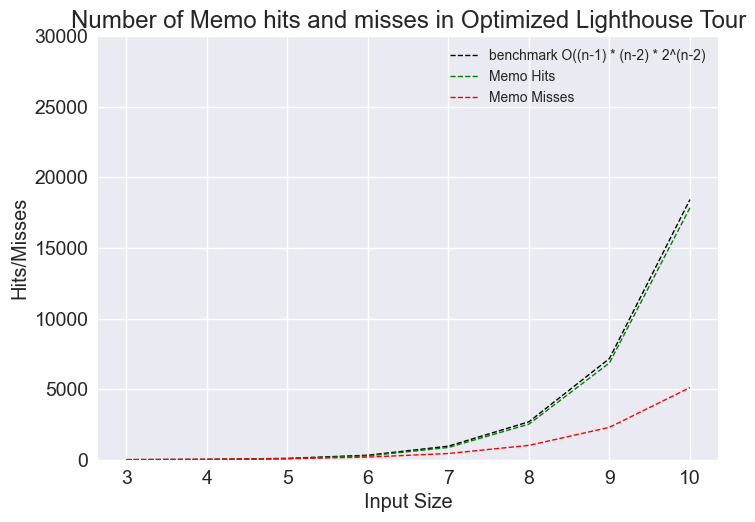

In [13]:
%matplotlib inline
from math import factorial
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

def print_table(xaxis, bf_vals, memo_vals, memo_sizes, results_memo_hits, result_memo_misses, bmark_vals):
    print("{:^10}|{:^10}|{:^10}|{:^10}|{:^10}|{:^10}|{:^10}".format("X", "BF STEPS", "MEMO STEPS", "MEMO SIZE", "MEMO_HITS", "MEMO_MISSES",  "BMARK"))
    print("-"*100)
    for a, b, c, d, e, f,g in zip(xaxis, bf_vals, memo_vals, memo_sizes, results_memo_hits,result_memo_misses, bmark_vals):
        print("{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}|{:^10.2f}".format(a, b, c, d, e, f, g))

def bmark(n):
    return n * (n-1) * (2**(n-1))
 
def bmark2(n):
    return (n**2) * (2**n)

def plot_memo_hits(xvals, results_memo_hits, result_memo_misses):
    plt.figure()
    plt.title("Number of Memo hits and misses in Optimized Lighthouse Tour", size="xx-large")
    plt.ylabel("Hits/Misses", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    plt.ylim([0, 30000])  # y-axis scale
    yTestVals1 = []
    for i in range(START, STOP):
        yTestVals1.append(bmark(i-1))
    plt.plot(xvals, yTestVals1, "k^--", markersize=0,linewidth=1, label="benchmark O((n-1) * (n-2) * 2^(n-2)")
    plt.plot(xvals, results_memo_hits, "g^--", markersize=0, linewidth=1, label="Memo Hits")
    plt.plot(xvals, result_memo_misses, "r^--", markersize=0, linewidth=1, label="Memo Misses")
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

def plot_memo_size(xvals, memo_sizes):
    plt.figure()
    plt.title("Size of Memo in Optimized Lighthouse Tour", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")
    plt.ylim([0, 30000])  # y-axis scale

    yTestVals1 = []
    for i in range(START, STOP):
        yTestVals1.append(i * 2**(i-1))

    plt.plot(xvals, yTestVals1, "k^--", markersize=0,
             linewidth=1, label="benchmark O(n * 2^n-1)")
    
    plt.plot(xvals, memo_sizes, "b^-", markersize=10, linewidth=2, label="Memo Size",  alpha=0.25)

    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()

def plot_steps(xvals, bf_steps, memo_steps, limit=True):
    plt.figure()
    plt.title("Performance of Optimized Lighthouse Tour", size="xx-large")
    plt.ylabel("Steps", size="x-large")
    plt.xlabel("Input Size", size="x-large")

    if limit: 
        plt.ylim([0, 60000])  # y-axis scale

    # generate bench mark data
    yTestVals1 = []
    yTestVals2 = []
    yTestVals3 = []
    yTestVals4 = []

    for i in range(START, STOP):
        yTestVals1.append(factorial(i))
        yTestVals2.append(bmark(i))
        yTestVals3.append(bmark2(i))
        yTestVals4.append(bmark(i-1))
        
    
    # plot bmark data
    plt.plot(xvals, yTestVals1, "r^--", markersize=0, linewidth=1, label="benchmark O(n!)")
    plt.plot(xvals, yTestVals2, "y^--", markersize=0, linewidth=1, label="benchmark O(n * (n-1) * 2^(n-1)")
    plt.plot(xvals, yTestVals3, "k^--", markersize=0, linewidth=1, label="benchmark O(n^2 * 2^n)")
    plt.plot(xvals, yTestVals4, "g^--", markersize=0, linewidth=1, label="benchmark O((n-1) * (n-2) * 2^(n-2)")

    # plot bf and memo steps
    plt.plot(xvals, memo_steps, "b^-", markersize=10, linewidth=2, label="Fastest Tour Memo",  alpha=0.25)
    plt.plot(xvals, bf_steps, "r^-", markersize=10, linewidth=2, label="Fastest Tour Brute Force",  alpha=0.25)
    plt.tick_params(axis="both", which="major", labelsize=14)
    plt.legend()
    plt.show()


xvals = [i for i in range(START, STOP)]
benchmarks = [bmark(i-1) for i in xvals]
result_bf_steps, result_memo_steps, result_memo_sizes, result_memo_hits, result_memo_misses = make_examples(START, STOP)
print_table(xvals, result_bf_steps, result_memo_steps, result_memo_sizes, result_memo_hits, result_memo_misses, benchmarks)

plot_steps(xvals, result_bf_steps, result_memo_steps, False)
plot_steps(xvals, result_bf_steps, result_memo_steps, True)
plot_memo_size(xvals, result_memo_sizes)
plot_memo_hits(xvals, result_memo_hits, result_memo_misses)

# PART 3 RETROSPECTION

## Retrospection (10 pts)

Explain your results here.  Your graph should "tell a story"... write the story in plain English here.

If you had a problem with your code, or graph, write down here how you followed the 1-2-3 Rule given in the Getting Started module.  You should explain what you tried to do, what did/did not work, and what you would do next if you had additional time.  **Important:  don't just turn in broken code, or graphs that don't match your analytic results!**  It's important to show that, if there was some problem, you recognized that there was an issue and what you were doing to resolve the disconnect.  Bugs and mistakes do happen, time does run out, but you need to show what you understand of the problem in order to get at least partial credit.  

Figure 1 nicely shows the drastic increase in performance over the brute force method (red) and the memoized optimization (blue). This highlights the importance of memoization, and algorithm design can have on a program’s execution. Figure 2 shows the asymptotic bounds of the brute force (red) and memoized (blue) algorithms. As noted above, the runtime of the brute force implementation is θ(n!) which can be nicely seen by the red dotted line. While the runtime analysis expected a tight bound of θ((n-1)*n*2^(n-1) ), the yellow dotted line that this bound represents does not represent a tight bound but an upper bound on the number of steps taken by fastest_tour_memo(). Rather, we see the that the red dotted line representing O(n-1)*(n-2)*2^(n-2) better fits the number of steps taken by fastest_tour_memo(). This could point to a factor of n that was not taken into consideration during the runtime analysis or an implementation error. We do note however that the function is bound from above by $$O(n^2*2^n)$$ (black dotted line) as expected. One possible reason the memozied runtime deviates from the prediction is the use of tuples as the memo lookup key. In python tuples only compare to true if they are exactly matching. 
Figure 3 show the size of the memo dictionary, which is also the number of base cases and recursive cases taken by the program. As we see this almost perfectly aligns with the expected number of subproblems, (n*2^(n-1) ). Lastly, figure 4 shows the number of memo hits and misses that occur during the execution of fastest_tour_memo(). 
I note several code improvements made, such as type hints, docstrings, error handling, wrapper functions and test cases. The test cases were especially useful in ensuring a proper implementation even when experimenting with memo lookup keys. Overall, this was a challenging lab but working through the algorithm on pen and paper, building helpful tables and charts and trying to shift my perspective on the problem, helped me get as close to a solution as possible


## Citations
Cite any help you received and any sources you referenced here
[1] Cormen, Thomas H., et al. Introduction to Algorithms, Fourth Edition, MIT Press, 2022. ProQuest Ebook Central, https://ebookcentral-proquest-com.proxy1.library.jhu.edu/lib/jhu/detail.action?docID=6925615.

[2] Course material 

[3] https://stackoverflow.com/a/22412921

[4] https://stackoverflow.com/a/44201508

In [9]:
# INSTRUCTOR-PROVIDED TEST DATA
# Ensure that your code matches both the input signature and the expected output
# For grading, different test data will be pasted into the input cell and your code cells will be executed
# Be sure that your input and output signatures match the provided sample data
# Times are symmetrical, so the reverse order tour is also acceptable (e.g. A, B, C or C, B, A)

# Test #1
TRAVEL_TIME_1 = {
    ('D', 'E'): 9.8874546134365,
    ('D', 'B'): 8.650955785569098,
    ('D', 'C'): 4.527990409960845,
    ('D', 'A'): 9.817667809230786,
    ('E', 'B'): 10.931854306263975,
    ('E', 'C'): 7.255251488484818,
    ('E', 'A'): 12.917982527478712,
    ('B', 'C'): 4.113565483054365,
    ('B', 'A'): 9.560863383439097,
    ('C', 'A'): 7.854345573910511,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  28.089873889890804

# Test #2
TRAVEL_TIME_2 = {
    ('B', 'C'): 6.429795406216918,
    ('B', 'A'): 11.629846115160516,
    ('B', 'D'): 7.679251919404714,
    ('B', 'E'): 9.347706263090837,
    ('C', 'A'): 12.280646160363432,
    ('C', 'D'): 7.746192483295421,
    ('C', 'E'): 9.90681627370574,
    ('A', 'D'): 12.227183481562683,
    ('A', 'E'): 16.655823285647106,
    ('D', 'E'): 8.25715774835559,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  34.06299175302845

# Test #3
TRAVEL_TIME_3 = {
    ('F', 'E'): 7.453320453415392,
    ('F', 'D'): 6.170569410345761,
    ('F', 'I'): 10.448429302986911,
    ('F', 'G'): 6.187750187309644,
    ('F', 'C'): 12.090422838563583,
    ('F', 'H'): 11.539119418380032,
    ('F', 'A'): 13.23865323724485,
    ('F', 'J'): 14.209616157057711,
    ('F', 'B'): 12.029520235766265,
    ('E', 'D'): 4.594971038617467,
    ('E', 'I'): 9.488857351897519,
    ('E', 'G'): 4.661282508675182,
    ('E', 'C'): 10.705763401441896,
    ('E', 'H'): 10.12354365573923,
    ('E', 'A'): 12.05863087182219,
    ('E', 'J'): 12.857918364285274,
    ('E', 'B'): 10.915808926216425,
    ('D', 'I'): 8.773798408565863,
    ('D', 'G'): 3.549820998388679,
    ('D', 'C'): 9.084763991756446,
    ('D', 'H'): 8.47244200438249,
    ('D', 'A'): 10.768085646027655,
    ('D', 'J'): 11.205467989446557,
    ('D', 'B'): 9.811703475051996,
    ('I', 'G'): 4.856711290250502,
    ('I', 'C'): 10.303247633652786,
    ('I', 'H'): 9.72873923304563,
    ('I', 'A'): 11.752971702744057,
    ('I', 'J'): 12.386140947772116,
    ('I', 'B'): 10.715926552978804,
    ('G', 'C'): 8.939922836985131,
    ('G', 'H'): 8.325372714362043,
    ('G', 'A'): 10.658709470483634,
    ('G', 'J'): 11.05300320168352,
    ('G', 'B'): 9.726036954632448,
    ('C', 'H'): 14.85107596522508,
    ('C', 'A'): 16.127909792272288,
    ('C', 'J'): 17.54748278310382,
    ('C', 'B'): 14.699070399680458,
    ('H', 'A'): 15.723529687188293,
    ('H', 'J'): 17.10791004081554,
    ('H', 'B'): 14.306778662449995,
    ('A', 'J'): 16.949188359233272,
    ('A', 'B'): 14.239542023142393,
    ('J', 'B'): 16.6207970728817,
}
# Expected output
# The best tour is:  A, B, C, D, E, F, G, H, I, J
# The best time is:  86.69967098910159

# Test 4 - test against the actual lighthouses used in the challenge, so
# you can see the original motivation for this assignment.  Times are from
# maps.google.com and reflect best possible driving times between two
# lighthouses subject to current traffic conditions.

# If you want to visualize this tour, it's here:
# https://goo.gl/maps/h9NbbQT5kS3S6kZ98

# Note that in the real world, travel times are highly dependent on time of
# day and are often not symmetrical-- that's part of why the TSP problem is
# so interesting!


TRAVEL_TIME_4 = {
    ('Concord Point', 'Seven Foot Knoll'): 0.88,
    ('Concord Point', 'Lightship Chesapeake'): 0.87,
    ('Concord Point', 'Hooper Strait'): 1.92,
    ('Concord Point', 'Choptank River'): 2.02,
    ('Concord Point', 'Drum Point'): 2.12,
    ('Concord Point', 'Cove Point'): 2.15,
    ('Concord Point', 'Piney Point'): 2.60,
    ('Concord Point', 'Point Lookout'): 2.73,
    ('Concord Point', 'Fort Washington'): 1.73,
    ('Concord Point', 'Sandy Point'): 1.28,
    ('Seven Foot Knoll', 'Lightship Chesapeake'): 0.07,
    ('Seven Foot Knoll', 'Hooper Strait'): 1.52,
    ('Seven Foot Knoll', 'Choptank River'): 1.62,
    ('Seven Foot Knoll', 'Drum Point'): 1.58,
    ('Seven Foot Knoll', 'Cove Point'): 1.62,
    ('Seven Foot Knoll', 'Piney Point'): 2.05,
    ('Seven Foot Knoll', 'Point Lookout'): 2.22,
    ('Seven Foot Knoll', 'Fort Washington'): 1.17,
    ('Seven Foot Knoll', 'Sandy Point'): 0.78,
    ('Lightship Chesapeake', 'Hooper Strait'): 1.47,
    ('Lightship Chesapeake', 'Choptank River'): 1.57,
    ('Lightship Chesapeake', 'Drum Point'): 1.53,
    ('Lightship Chesapeake', 'Cove Point'): 1.57,
    ('Lightship Chesapeake', 'Piney Point'): 1.98,
    ('Lightship Chesapeake', 'Point Lookout'): 2.17,
    ('Lightship Chesapeake', 'Fort Washington'): 1.12,
    ('Lightship Chesapeake', 'Sandy Point'): 0.73,
    ('Hooper Strait', 'Choptank River'): 0.60,
    ('Hooper Strait', 'Drum Point'): 2.03,
    ('Hooper Strait', 'Cove Point'): 2.08,
    ('Hooper Strait', 'Piney Point'): 2.50,
    ('Hooper Strait', 'Point Lookout'): 2.67,
    ('Hooper Strait', 'Fort Washington'): 1.77,
    ('Hooper Strait', 'Sandy Point'): 0.93,
    ('Choptank River', 'Drum Point'): 2.13,
    ('Choptank River', 'Cove Point'): 2.17,
    ('Choptank River', 'Piney Point'): 2.60,
    ('Choptank River', 'Point Lookout'): 2.77,
    ('Choptank River', 'Fort Washington'): 1.85,
    ('Choptank River', 'Sandy Point'): 1.03,
    ('Drum Point', 'Cove Point'): 0.23,
    ('Drum Point', 'Piney Point'): 0.48,
    ('Drum Point', 'Point Lookout'): 0.63,
    ('Drum Point', 'Fort Washington'): 1.18,
    ('Drum Point', 'Sandy Point'): 1.32,
    ('Cove Point', 'Piney Point'): 0.70,
    ('Cove Point', 'Point Lookout'): 0.83,
    ('Cove Point', 'Fort Washington'): 1.28,
    ('Cove Point', 'Sandy Point'): 1.35,
    ('Piney Point', 'Point Lookout'): 0.72,
    ('Piney Point', 'Fort Washington'): 1.42,
    ('Piney Point', 'Sandy Point'): 1.78,
    ('Point Lookout', 'Fort Washington'): 1.67,
    ('Point Lookout', 'Sandy Point'): 1.97,
    ('Fort Washington', 'Sandy Point'): 1.05,
}


# Expected output
# The best tour is:  Choptank River, Hooper Strait, Sandy Point, Concord Point, Seven Foot Knoll, Lightship Chesapeake,
#       Fort Washington, Cove Point, Drum Point, Piney Point, Point Lookout
# The best time is:  7.59

In [10]:
def run_tests(travel_times, answer_tour, answer_time):
    L = list(set([item for k in travel_times.keys() for item in k]))
    print("\n------------------------------------\n")
    print(f"Running test on input: {L}")
    best_tour, best_time, steps, best_start, memo_sizes = fastest_tour_wrapper_memo(L, travel_times)
    print(f"Result:\n\t{best_tour=}\n\t{best_time=}\n\t{steps=}\n\t{best_start=}\n\t{memo_sizes=}")
    assert best_tour == answer_tour or best_tour[::-1] == answer_tour, f"Expected {answer_tour} got {best_tour}"
    assert best_time == answer_time, f"Expected {answer_time} got {best_time}"
    print("TEST PASSED")
    print("\n------------------------------------\n")

In [11]:
# Test #1
TRAVEL_TIME = {
    ("D", "E"): 9.8874546134365,
    ("D", "B"): 8.650955785569098,
    ("D", "C"): 4.527990409960845,
    ("D", "A"): 9.817667809230786,
    ("E", "B"): 10.931854306263975,
    ("E", "C"): 7.255251488484818,
    ("E", "A"): 12.917982527478712,
    ("B", "C"): 4.113565483054365,
    ("B", "A"): 9.560863383439097,
    ("C", "A"): 7.854345573910511,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  28.089873889890804
answer = ["A", "B", "C", "D", "E"]
time = 28.089873889890804
run_tests(TRAVEL_TIME, answer, time)


# Test #2
TRAVEL_TIME = {
    ("B", "C"): 6.429795406216918,
    ("B", "A"): 11.629846115160516,
    ("B", "D"): 7.679251919404714,
    ("B", "E"): 9.347706263090837,
    ("C", "A"): 12.280646160363432,
    ("C", "D"): 7.746192483295421,
    ("C", "E"): 9.90681627370574,
    ("A", "D"): 12.227183481562683,
    ("A", "E"): 16.655823285647106,
    ("D", "E"): 8.25715774835559,
}
# Expected output
# The best tour is:  A, B, C, D, E
# The best time is:  34.06299175302845
answer = ["A", "B", "C", "D", "E"]
time = 34.06299175302845
run_tests(TRAVEL_TIME, answer, time)


# Test #3
TRAVEL_TIME = {
    ("F", "E"): 7.453320453415392,
    ("F", "D"): 6.170569410345761,
    ("F", "I"): 10.448429302986911,
    ("F", "G"): 6.187750187309644,
    ("F", "C"): 12.090422838563583,
    ("F", "H"): 11.539119418380032,
    ("F", "A"): 13.23865323724485,
    ("F", "J"): 14.209616157057711,
    ("F", "B"): 12.029520235766265,
    ("E", "D"): 4.594971038617467,
    ("E", "I"): 9.488857351897519,
    ("E", "G"): 4.661282508675182,
    ("E", "C"): 10.705763401441896,
    ("E", "H"): 10.12354365573923,
    ("E", "A"): 12.05863087182219,
    ("E", "J"): 12.857918364285274,
    ("E", "B"): 10.915808926216425,
    ("D", "I"): 8.773798408565863,
    ("D", "G"): 3.549820998388679,
    ("D", "C"): 9.084763991756446,
    ("D", "H"): 8.47244200438249,
    ("D", "A"): 10.768085646027655,
    ("D", "J"): 11.205467989446557,
    ("D", "B"): 9.811703475051996,
    ("I", "G"): 4.856711290250502,
    ("I", "C"): 10.303247633652786,
    ("I", "H"): 9.72873923304563,
    ("I", "A"): 11.752971702744057,
    ("I", "J"): 12.386140947772116,
    ("I", "B"): 10.715926552978804,
    ("G", "C"): 8.939922836985131,
    ("G", "H"): 8.325372714362043,
    ("G", "A"): 10.658709470483634,
    ("G", "J"): 11.05300320168352,
    ("G", "B"): 9.726036954632448,
    ("C", "H"): 14.85107596522508,
    ("C", "A"): 16.127909792272288,
    ("C", "J"): 17.54748278310382,
    ("C", "B"): 14.699070399680458,
    ("H", "A"): 15.723529687188293,
    ("H", "J"): 17.10791004081554,
    ("H", "B"): 14.306778662449995,
    ("A", "J"): 16.949188359233272,
    ("A", "B"): 14.239542023142393,
    ("J", "B"): 16.6207970728817,
}
# Expected output
# The best tour is:  A, B, C, D, E, F, G, H, I, J
# The best time is:  86.69967098910159

answer = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]
time = 86.69967098910159
run_tests(TRAVEL_TIME, answer, time)


# Test 4 - test against the actual lighthouses used in the challenge, so
# you can see the original motivation for this assignment.  Times are from
# maps.google.com and reflect best possible driving times between two
# lighthouses subject to current traffic conditions.

# If you want to visualize this tour, it's here:
# https://goo.gl/maps/h9NbbQT5kS3S6kZ98

# Note that in the real world, travel times are highly dependent on time of
# day and are often not symmetrical-- that's part of why the TSP problem is
# so interesting!

TRAVEL_TIME = {
    ("Concord Point", "Seven Foot Knoll"): 0.88,
    ("Concord Point", "Lightship Chesapeake"): 0.87,
    ("Concord Point", "Hooper Strait"): 1.92,
    ("Concord Point", "Choptank River"): 2.02,
    ("Concord Point", "Drum Point"): 2.12,
    ("Concord Point", "Cove Point"): 2.15,
    ("Concord Point", "Piney Point"): 2.60,
    ("Concord Point", "Point Lookout"): 2.73,
    ("Concord Point", "Fort Washington"): 1.73,
    ("Concord Point", "Sandy Point"): 1.28,
    ("Seven Foot Knoll", "Lightship Chesapeake"): 0.07,
    ("Seven Foot Knoll", "Hooper Strait"): 1.52,
    ("Seven Foot Knoll", "Choptank River"): 1.62,
    ("Seven Foot Knoll", "Drum Point"): 1.58,
    ("Seven Foot Knoll", "Cove Point"): 1.62,
    ("Seven Foot Knoll", "Piney Point"): 2.05,
    ("Seven Foot Knoll", "Point Lookout"): 2.22,
    ("Seven Foot Knoll", "Fort Washington"): 1.17,
    ("Seven Foot Knoll", "Sandy Point"): 0.78,
    ("Lightship Chesapeake", "Hooper Strait"): 1.47,
    ("Lightship Chesapeake", "Choptank River"): 1.57,
    ("Lightship Chesapeake", "Drum Point"): 1.53,
    ("Lightship Chesapeake", "Cove Point"): 1.57,
    ("Lightship Chesapeake", "Piney Point"): 1.98,
    ("Lightship Chesapeake", "Point Lookout"): 2.17,
    ("Lightship Chesapeake", "Fort Washington"): 1.12,
    ("Lightship Chesapeake", "Sandy Point"): 0.73,
    ("Hooper Strait", "Choptank River"): 0.60,
    ("Hooper Strait", "Drum Point"): 2.03,
    ("Hooper Strait", "Cove Point"): 2.08,
    ("Hooper Strait", "Piney Point"): 2.50,
    ("Hooper Strait", "Point Lookout"): 2.67,
    ("Hooper Strait", "Fort Washington"): 1.77,
    ("Hooper Strait", "Sandy Point"): 0.93,
    ("Choptank River", "Drum Point"): 2.13,
    ("Choptank River", "Cove Point"): 2.17,
    ("Choptank River", "Piney Point"): 2.60,
    ("Choptank River", "Point Lookout"): 2.77,
    ("Choptank River", "Fort Washington"): 1.85,
    ("Choptank River", "Sandy Point"): 1.03,
    ("Drum Point", "Cove Point"): 0.23,
    ("Drum Point", "Piney Point"): 0.48,
    ("Drum Point", "Point Lookout"): 0.63,
    ("Drum Point", "Fort Washington"): 1.18,
    ("Drum Point", "Sandy Point"): 1.32,
    ("Cove Point", "Piney Point"): 0.70,
    ("Cove Point", "Point Lookout"): 0.83,
    ("Cove Point", "Fort Washington"): 1.28,
    ("Cove Point", "Sandy Point"): 1.35,
    ("Piney Point", "Point Lookout"): 0.72,
    ("Piney Point", "Fort Washington"): 1.42,
    ("Piney Point", "Sandy Point"): 1.78,
    ("Point Lookout", "Fort Washington"): 1.67,
    ("Point Lookout", "Sandy Point"): 1.97,
    ("Fort Washington", "Sandy Point"): 1.05,
}

# Expected output
# The best tour is:  Choptank River, Hooper Strait, Sandy Point, Concord Point, Seven Foot Knoll, Lightship Chesapeake,
#       Fort Washington, Cove Point, Drum Point, Piney Point, Point Lookout
# The best time is:  7.59
answer = [
    "Choptank River",
    "Hooper Strait",
    "Sandy Point",
    "Concord Point",
    "Seven Foot Knoll",
    "Lightship Chesapeake",
    "Fort Washington",
    "Cove Point",
    "Drum Point",
    "Piney Point",
    "Point Lookout",
]
time = 7.59
run_tests(TRAVEL_TIME, answer, time)


------------------------------------

Running test on input: ['B', 'D', 'A', 'C', 'E']
Result:
	best_tour=['A', 'B', 'C', 'D', 'E']
	best_time=28.089873889890804
	steps=90
	best_start={'B': (['B', 'C', 'E', 'D', 'A'], 31.07393939420647), 'D': (['D', 'A', 'B', 'C', 'E'], 30.747348164209065), 'A': (['A', 'B', 'C', 'D', 'E'], 28.089873889890804), 'C': (['C', 'B', 'A', 'D', 'E'], 33.37955128916075), 'E': (['E', 'D', 'C', 'B', 'A'], 28.089873889890807)}
	memo_sizes=75
TEST PASSED

------------------------------------


------------------------------------

Running test on input: ['B', 'D', 'A', 'C', 'E']
Result:
	best_tour=['A', 'B', 'C', 'D', 'E']
	best_time=34.06299175302845
	steps=90
	best_start={'B': (['B', 'C', 'E', 'D', 'A'], 36.820952909840926), 'D': (['D', 'E', 'C', 'B', 'A'], 36.22361554343877), 'A': (['A', 'B', 'C', 'D', 'E'], 34.06299175302845), 'C': (['C', 'B', 'E', 'D', 'A'], 36.261842899226025), 'E': (['E', 'D', 'C', 'B', 'A'], 34.06299175302845)}
	memo_sizes=75
TEST PASSED

